In [1]:
import numpy as np
import scipy
from qutip import *
from numba import jit, njit

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LinearSegmentedColormap

from mpl_toolkits.mplot3d import Axes3D
from plotly.offline import plot
import plotly.graph_objs as go

In [32]:
arr_eta = np.array([0, .47, .54, .003, 1, .07, .11, .14, .01, .01, .27])/5.24   #data from zirchelbach DBT: alpha in pDCB, FC_zpl = 5.24
arr_freq = np.array([1, 175.1, 227.3, 288.3, 292, 409.3, 460.2, 672.9, 766, 770.3, 776.1])/33.356 # in THz , conversion factor from cm^-1 = 33.356
arr_gamma = np.array([0.06, 31.2, 37.8, 8.5, 9, 13.2, 14.6, 4, 6.7, 8.1, 14.6])/1000    #in THz

arr_om = np.linspace(-15,25, 10000)

eta, om = np.meshgrid(arr_eta, arr_om )
freq, om = np.meshgrid(arr_freq, arr_om)
gamma, om = np.meshgrid(arr_gamma, arr_om)

gamma_opt = 10/1000
Omega_opt = 1/1000

T = 1

n_th = 1/(np.exp(freq/T)-1)

Gamma_plus = gamma_opt**2/( 4*arr_om**2 + gamma_opt**2 ) + np.sum( (1+n_th) * eta**2 * gamma**2/( 4*(freq-om)**2 + gamma**2 ), axis=1 ) + np.sum( n_th * eta**2 * gamma**2/( 4*(freq+om)**2 + gamma**2 ), axis=1 )


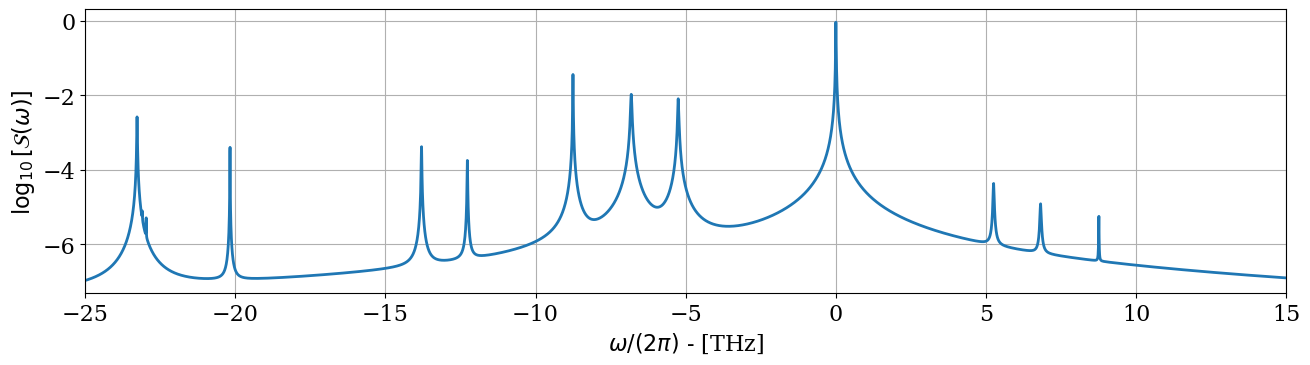

In [49]:
font = {
    'family': 'serif',
    'color': 'black',
    'weight': 'normal',
    'size': 16,
}
# Apply the font globally
plt.rcParams['font.family'] = font['family']
plt.rcParams['font.size'] = font['size']
plt.rcParams['axes.labelsize'] = font['size']
plt.rcParams['xtick.labelsize'] = font['size']
plt.rcParams['ytick.labelsize'] = font['size']

plt.plot(-arr_om, np.log10(Gamma_plus), linewidth=2 )
plt.xlim((-25,15))

plt.xlabel(r'$\omega/(2\pi)$ - [THz]', fontdict=font)
plt.ylabel(r'$\log_{10}\left[\mathcal{S}(\omega)\right]$', fontdict=font)

plt.grid()
plt.gcf().set_size_inches(340 / 25.4, 100 / 25.4)
plt.tight_layout()

#plt.savefig('zirchel_emission_S.pdf')